Belfiore Asia, CID:02129867

MSc Advanced Computing, Spring Term, January 2025

# **Acute Kidney Injury (AKI) Neural Network Predictor**

In [19]:
import numpy as np  # add to requirements.txt
from utils import *
import matplotlib.pyplot as plt
from sklearn.metrics import fbeta_score
from sklearn.linear_model import SGDClassifier # add to requirements.txt

# 0. Define Local Data Paths
train_data_path = 'data/training.csv'
test_data_path = 'data/test.csv'

def plot_accuracy(model, y_true, model_name, f3_score):
    fig, ax = plt.subplots()
    plt.hist(model, color='g', alpha=0.4, label='NHS')
    if y_true is not None:
        plt.hist(y_true, color='r', alpha=1, histtype='step', label='True Diagnosis')
    plt.title(f"Accuracy of {model_name} with F3 Score: {f3_score}")
    plt.xlabel(f'{model_name} Diagnosis')
    plt.ylabel('Number of Patients')
    plt.legend()

In [314]:
def nhs_aki_algo(patient):
    """
    """
    [sex, age, c1, rv1, rv2, rv_ratio, D] = patient
    # (low_ri, high_ri) = get_reference_interval(sex, age)
    if rv_ratio >= 1.5:
        return 1
    elif D > 26:
        return 1
    else:
        return 0


def get_reference_interval(sex, age):
    """
        Return the Population Reference Interval (RI) based on
        age and sex of patient.
        source: resources/annual_conference_2016_-_recognition_of_aki.pdf
        https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.nwts.nhs.uk/_file/gCDJ8vu46p_275810.pdf&ved=2ahUKEwifj_P0mfuKAxWqXUEAHQ0oKQEQFnoECBcQAQ&usg=AOvVaw01O_TsELBULOw3GvBNEv3p
    """
    if age > 16:
        if sex == 'm': return (59, 104)
        else: return (45, 84)
    elif age == 16: 
        if sex == 'm': return (54, 99)
        else: return (48, 81)
    elif age == 15: 
        if sex == 'm': return (47, 98)
        else: return (44, 79)
    elif age == 14: 
        if sex == 'm': return (40, 83)
        else: return (43, 75)
    elif age == 13: 
        if sex == 'm': return (38, 76)
        else: return (38, 74)
    elif age == 12: return (36, 67)
    elif age == 11: return (36, 64)
    elif 9 <= age < 11: return (28, 57)
    elif 7 <= age < 9: return (30, 48)
    elif 5 <= age < 7: return (25, 42)
    elif 3 <= age < 5: return (23, 37)
    elif 1 <= age < 3: return (15, 31)
    elif age < 1: return (14, 81)

In [20]:
# 1. Load Training and Testing Datasets
train_data = prepare_train_data('data/training.csv')
test_data = prepare_train_data('data/test.csv')
train_data.shape, test_data.shape

((7301, 8), (7402, 8))

In [21]:
# 2. Prepare Data
X_train = train_data.loc[:,'sex':'D']
Y_train = train_data.loc[:,'aki']
print(X_train.shape, Y_train.shape)

X_test = test_data.loc[:,'sex':'D']
Y_test = test_data.loc[:,'aki']
print(X_test.shape, Y_test.shape)

(7301, 7) (7301,)
(7402, 7) (7402,)


SGDClassifier(max_iter=100) 
45 wrong predictions out of 7402
F3 Score: 0.9899725362457686


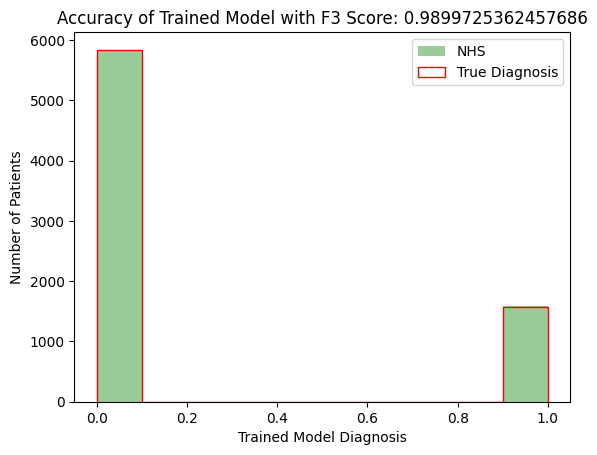

In [22]:
# 2. Define Model
# model_aki = sklearn.naive_bayes.GaussianNB()
model_aki = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)

# 3. Train Model
model_aki.fit(X_train.values, Y_train.values)

# 4. Evaluate Model
y_pred = model_aki.predict(X_test.values)
print(model_aki, f"\n{(Y_test != y_pred).sum()} wrong predictions out of {X_test.shape[0]}")

# 4. Compute F3 Score
model_f3 = fbeta_score(Y_test, y_pred, beta=3)
print("F3 Score:", model_f3)
# 4.b. Plot Model Accuracy
plot_accuracy(y_pred, Y_test, 'Trained Model', model_f3)

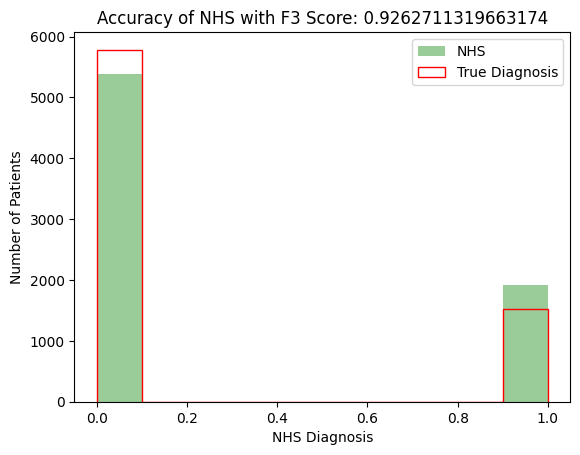

In [23]:
# from importlib import reload
# import numpy as np 
# import utils
# reload(utils)

# from utils import *

# 5 Compare to NHS algorithm
# 5.a NHS Train Dataset Prediction 
nhs_aki = [nhs_aki_algo(row.tolist()) for i,row in X_train.iterrows()]
nhs_f3 = fbeta_score(Y_train, np.array(nhs_aki), beta=3)
# 5.b Plot Train Prediction Accuracy
plot_accuracy(nhs_aki, Y_train, 'NHS', nhs_f3)

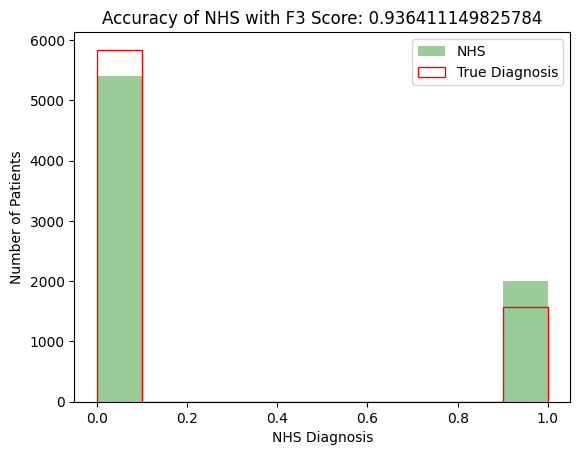

In [24]:
# 5.d NHS Test Dataset Prediction 
nhs_test_aki = [nhs_aki_algo(row.tolist()) for i,row in X_test.iterrows()]
nhs_f3 = fbeta_score(Y_test, nhs_test_aki, beta=3)
# 5.d Plot Test Prediction Accuracy
plot_accuracy(nhs_test_aki, Y_test, 'NHS', nhs_f3)